## **Libraries**

In [ ]:
# Drive
from google.colab import drive
import pandas as pd
import chess.pgn

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
sns.set(style='whitegrid', palette="deep", font_scale=1.1)

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

# Split DF into Test and Train
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor

import sklearn.metrics as metrics

# For ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## **Data**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/Shared drives/DSF_Project/dataset/Standard/CSV/2019'

/content/drive/Shared drives/DSF_Project/dataset/Standard/CSV/2019


In [ ]:
df = pd.read_csv('2019_10_53000.csv')

In [ ]:
df

,ID,Event,Site,Date,Round,White,Black,WhiteTitle,BlackTitle,Result,BlackElo,BlackRatingDiff,ECO,Opening,Termination,TimeControl,UTCDate,UTCTime,WhiteElo,WhiteRatingDiff,Moves,White1,Black1,White2,Black2
0,0,Rated Bullet game,https://lichess.org/WjPYNbE6,2019.10.01,-,Charles_Martel,blackrock_rdl,NaN,NaN,0-1,1531,10.0,C50,Giuoco Piano,Normal,60+0,2019.10.01,00:00:07,1688,-10.0,"e2e4,b8c6,g1f3,e7e5,f1c4,f8c5,f3g5,d8g5,d2d4,g...",e2e4,"e2e4,b8c6","e2e4,b8c6,g1f3","e2e4,b8c6,g1f3,e7e5"
1,1,Rated Bullet game,https://lichess.org/Rzcb04V7,2019.10.01,-,angelelizondo,the_speare,NaN,NaN,0-1,1390,8.0,B01,Scandinavian Defense,Normal,60+0,2019.10.01,00:00:07,1418,-8.0,"e2e4,d7d5,d1f3,d5e4,f3e4,g8f6,e4f3,b8c6,f1c4,c...",e2e4,"e2e4,d7d5","e2e4,d7d5,d1f3","e2e4,d7d5,d1f3,d5e4"
2,2,Rated Bullet game,https://lichess.org/tEfsXUm3,2019.10.01,-,Rember280714,Konduzzjoni,NaN,NaN,1-0,1988,-6.0,A46,Torre Attack #2,Normal,60+0,2019.10.01,00:00:07,2002,7.0,"d2d4,g8f6,g1f3,e7e5,e2e3,e5d4,f3d4,f8c5,d4b3,c...",d2d4,"d2d4,g8f6","d2d4,g8f6,g1f3","d2d4,g8f6,g1f3,e7e5"
3,3,Rated Bullet game,https://lichess.org/iDQu0Vv4,2019.10.01,-,seven7000,pajarraco1006,NaN,NaN,1-0,2132,-8.0,A27,"English Opening: King's English Variation, Thr...",Normal,60+0,2019.10.01,00:00:07,2096,8.0,"c2c4,b8c6,b1c3,e7e5,g1f3,f8c5,g2g3,g8f6,f1g2,d...",c2c4,"c2c4,b8c6","c2c4,b8c6,b1c3","c2c4,b8c6,b1c3,e7e5"
4,4,Rated Bullet game,https://lichess.org/u87U7QjG,2019.10.01,-,shapa11,TwinkleToes,NaN,NaN,1-0,2059,-6.0,A15,English Opening: Anglo-Indian Defense,Normal,60+0,2019.10.01,00:00:07,2079,7.0,"c2c4,g8f6,e2e3,g7g6,g1f3,f8g7,a2a3,d7d6,b2b4,e...",c2c4,"c2c4,g8f6","c2c4,g8f6,e2e3","c2c4,g8f6,e2e3,g7g6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52627,52627,Rated Blitz game,https://lichess.org/H1fPTKuL,2019.10.01,-,lamantinka,Revealchess,NaN,NaN,1-0,1749,-7.0,B40,Sicilian Defense: French Variation,Normal,180+2,2019.10.01,01:29:29,1780,6.0,"e2e4,c7c5,g1f3,e7e6,b1c3,a7a6,a2a3,b8c6,d2d3,g...",e2e4,"e2e4,c7c5","e2e4,c7c5,g1f3","e2e4,c7c5,g1f3,e7e6"
52628,52628,Rated Blitz game,https://lichess.org/OIlqKkYv,2019.10.01,-,Quijano54,jcmatos,NaN,NaN,1-0,1450,-8.0,C64,Ruy Lopez: Classical Variation,Normal,180+2,2019.10.01,01:29:29,1421,8.0,"e2e4,e7e5,g1f3,b8c6,f1b5,f8c5,b5c6,b7c6,e1g1,g...",e2e4,"e2e4,e7e5","e2e4,e7e5,g1f3","e2e4,e7e5,g1f3,b8c6"
52629,52629,Rated Blitz game,https://lichess.org/dXE6AFWz,2019.10.01,-,betterthankip,garid0s,NaN,NaN,0-1,1241,7.0,C00,French Defense: Steinitz Attack,Normal,180+2,2019.10.01,01:29:29,1214,-6.0,"e2e4,e7e6,e4e5,b8c6,g1f3,d7d5,d2d4,g8e7,b2b3,e...",e2e4,"e2e4,e7e6","e2e4,e7e6,e4e5","e2e4,e7e6,e4e5,b8c6"
52630,52630,Rated Blitz game,https://lichess.org/YrDk4bRa,2019.10.01,-,DrKhaos,rogerio0308,NaN,NaN,0-1,1705,6.0,C50,Italian Game: Schilling-Kostic Gambit,Normal,180+2,2019.10.01,01:29:29,1669,-105.0,"e2e4,e7e5,g1f3,b8c6,f1c4,c6d4,f3e5,d8g5,c4f7,e...",e2e4,"e2e4,e7e5","e2e4,e7e5,g1f3","e2e4,e7e5,g1f3,b8c6"


In [ ]:
df_raw = df.copy()

In [ ]:
df_raw.shape

(52632, 25)

In [ ]:
df_raw.dtypes

## **Data Processing**

In [ ]:
df_raw.isna().sum()

ID                     0
Event                  0
Site                   0
Date                   0
Round                  0
White                  0
Black                  0
WhiteTitle         52342
BlackTitle         52358
Result                 0
BlackElo               0
BlackRatingDiff       19
ECO                    0
Opening                0
Termination            0
TimeControl            0
UTCDate                0
UTCTime                0
WhiteElo               0
WhiteRatingDiff       19
Moves                 80
White1                80
Black1               146
White2               204
Black2               239
dtype: int64

In [ ]:
#Drop Columns
df_raw.drop(['Site','Date','WhiteTitle','BlackTitle','Round'], axis=1, inplace=True)

In [ ]:
#Drop Nan Values
df_raw = df_raw.dropna(subset=['Moves','Black2','BlackRatingDiff','WhiteRatingDiff'], how='any')

In [ ]:
#Remove Values that are not required for the following columns
df_raw=df_raw[df_raw.Result!='*']
df_raw=df_raw[df_raw.TimeControl!='-']
df_raw=df_raw[df_raw.Termination!='Abandoned']

In [ ]:
df_raw.shape

(52552, 23)

In [ ]:
df_raw.isna().sum()

ID                 0
Event              0
White              0
Black              0
Result             0
BlackElo           0
BlackRatingDiff    0
ECO                0
Opening            0
Termination        0
TimeControl        0
UTCDate            0
UTCTime            0
WhiteElo           0
WhiteRatingDiff    0
Moves              0
White1             0
Black1             0
White2             0
Black2             0
dtype: int64

In [ ]:
df_raw['ELO_Class']=df_raw['ID']
print(df_raw['ELO_Class'])

0            0
1            1
2            2
3            3
4            4
         ...  
52627    52627
52628    52628
52629    52629
52630    52630
52631    52631
Name: ELO_Class, Length: 52286, dtype: int64


In [ ]:
df_white=df_raw.copy()
df_black=df_raw.copy()

Text(0.5, 1.0, 'Black Player - ELO Scores')

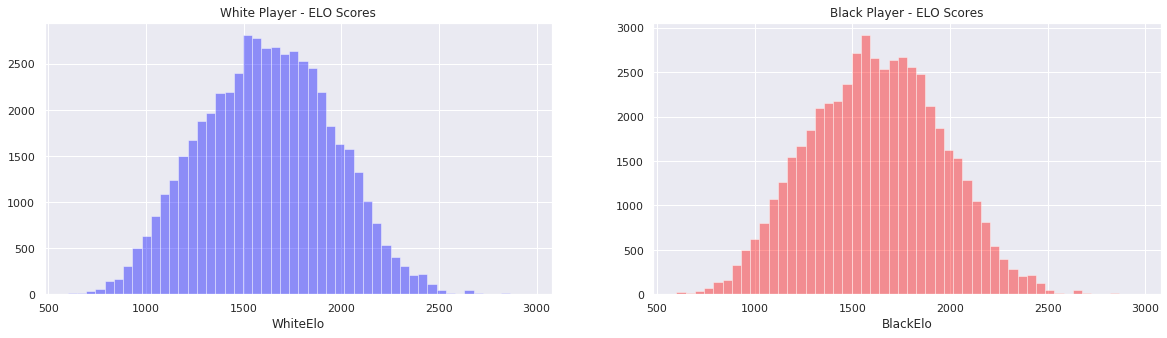

In [ ]:
sns.set()
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(df_raw['WhiteElo'], color='blue',kde=False, ax=ax[0]).set_title('White Player - ELO Scores')
sns.distplot(df_raw['BlackElo'], color='red',kde=False, ax=ax[1]).set_title('Black Player - ELO Scores')

In [ ]:
df_white.loc[df_white.WhiteElo<=1500, 'ELO_Class'] = "Low Score"
df_white.loc[(df_white.WhiteElo>1500) & (df_white.WhiteElo<=2000), 'ELO_Class'] = "Mid Score"
df_white.loc[df_white.WhiteElo>2000, 'ELO_Class'] = "High Score"

df_black.loc[df_black.BlackElo<=1500, 'ELO_Class'] = "Low Score"
df_black.loc[(df_black.BlackElo>1500) & (df_black.BlackElo<=2000), 'ELO_Class'] = "Mid Score"
df_black.loc[df_black.BlackElo>2000, 'ELO_Class'] = "High Score"

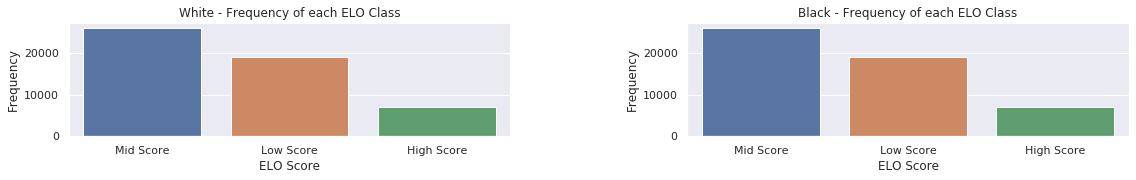

In [ ]:
fig = plt.figure(figsize=(19,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
g = sns.countplot(data=df_white, x='ELO_Class').set(xlabel='ELO Score', ylabel='Frequency', title='White - Frequency of each ELO Class');
ax = fig.add_subplot(2, 2, 2)
g = sns.countplot(data=df_white, x='ELO_Class').set(xlabel='ELO Score', ylabel='Frequency', title='Black - Frequency of each ELO Class');

plt.show()

In [ ]:
target_white = df_white['ELO_Class']
target_black = df_black['ELO_Class']

df_white.drop(['ELO_Class'], axis=1, inplace=True)
df_black.drop(['ELO_Class'], axis=1, inplace=True)

In [ ]:
# Label Encoding

# For training set
# Categorical boolean mask
cat_ft1 = df_white.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols1 = df_white.columns[cat_ft1].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_white[cat_cols1] = df_white[cat_cols1].apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
# Label Encoding

# For training set
# Categorical boolean mask
cat_ft1 = df_black.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols1 = df_black.columns[cat_ft1].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_black[cat_cols1] = df_black[cat_cols1].apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
# Label Encoding

# For training set
# Categorical boolean mask
cat_ft1 = df_raw.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols1 = df_raw.columns[cat_ft1].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_raw[cat_cols1] = df_raw[cat_cols1].apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
df_raw

## **Analysis**

### **Features**

In [ ]:
# Select Best Features based on best prediction for target = ELO Score

# Data
X1 = df_raw.iloc[:, [1,4,7,8,9,10,14]]  # Independent columns
Y1 = df_raw.iloc[:, 13]          # Target column i.e White ELO

X2 = df_raw.iloc[:, [1,4,6,7,8,9,10]]  # Independent columns
Y2 = df_raw.iloc[:, 5]          # Target column i.e Black ELO

In [ ]:
# Build Model
model1 = ExtraTreesClassifier()
model1.fit(X1,Y1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

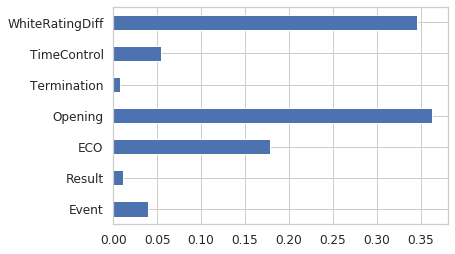

In [ ]:
# Plot graph of feature importances for better visualization
feat_importances1 = pd.Series(model1.feature_importances_, index=X1.columns)
feat_importances1.plot(kind='barh')
plt.show()

In [ ]:
# Build Model
model2 = ExtraTreesClassifier()
model2.fit(X2,Y2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Plot graph of feature importances for better visualization
feat_importances2 = pd.Series(model2.feature_importances_, index=X2.columns)
feat_importances2.nlargest(8).plot(kind='barh')
plt.show()

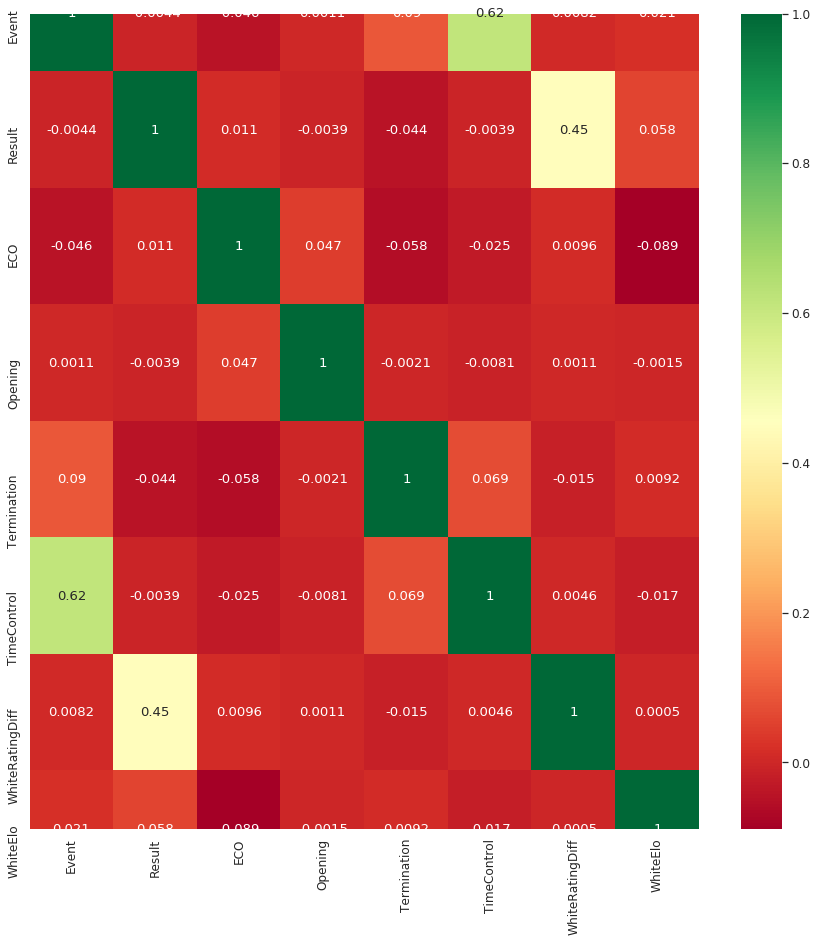

In [ ]:
# Get Correlation - White

# Select 15 Features
cols1 = list(feat_importances1.index)

# Add SalePrice to Best Features to compare correlation
cols1.append('WhiteElo')
temp_df1 = (df_raw[cols1]).copy()

# Find Correlation
corrmat1 = temp_df1.corr()
top_corr_features1 = corrmat1.index

# Plot Heat Map
plt.figure(figsize=(15,15))
sns.heatmap(temp_df1[top_corr_features1].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Get Correlation - Black

# Select 15 Features
cols2 = list(feat_importances2.index)

# Add SalePrice to Best Features to compare correlation
cols2.append('BlackElo')
temp_df2 = (df_raw[cols2]).copy()

# Find Correlation
corrmat2 = temp_df2.corr()
top_corr_features2 = corrmat2.index

# Plot Heat Map
plt.figure(figsize=(17,10))
sns.heatmap(temp_df2[top_corr_features2].corr(),annot=True,cmap="RdYlGn").set(title='Correlation of features with Black ELO Score')

### **Event**

In [ ]:
temp = df.copy()

In [ ]:
temp

In [ ]:
count  = temp['Event'].value_counts()
pd.DataFrame({'Event': count.index, 'Frequency':count.values})

,Event,Frequency
0,Blitz,24708
1,Bullet,19738
2,Rapid,6034
3,Classical,1662
4,UltraBullet,387
5,Correspondence,103


In [ ]:
for i, row in temp.iterrows():
  split = (temp['Event'][i]).split()
  temp.set_value(i,'Event', split[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


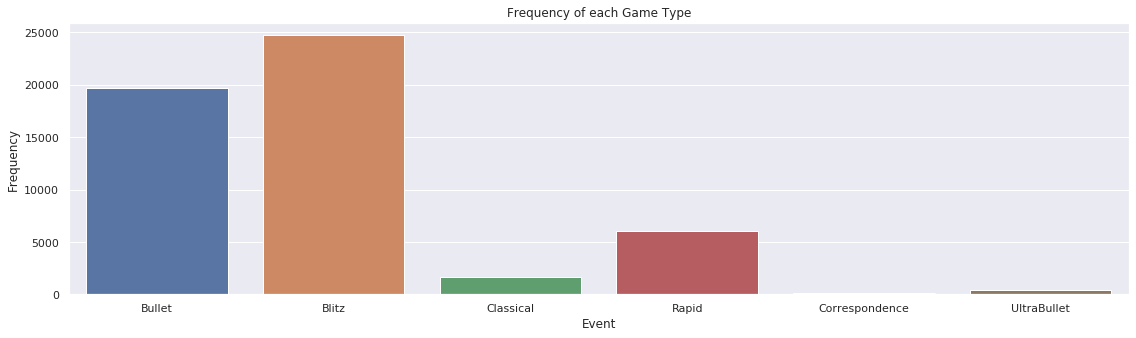

In [ ]:
fig = plt.figure(figsize=(19,5))
g = sns.countplot(data=temp, x='Event').set(xlabel='Event', ylabel='Frequency', title='Frequency of each Game Type');

### **Time Control**

In [ ]:
count  = temp['TimeControl'].value_counts()
pd.DataFrame({'TimeControl': count.index, 'Frequency':count.values})

,TimeControl,Frequency
0,60+0,14751
1,180+0,9861
2,300+0,8624
3,600+0,5022
4,120+1,3869
...,...,...
159,660+12,1
160,480+2,1
161,45+1,1
162,780+7,1


In [ ]:
temp['TimeControl'] = temp['TimeControl'].str.replace('-','0+0')

In [ ]:
for i, row in temp.iterrows():
  split = str(temp['TimeControl'][i]).split('+')
  left = float(split[0])/60
  right = float(split[1])*40/60
  total = left+right
  temp.set_value(i,'TimeControl', total)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


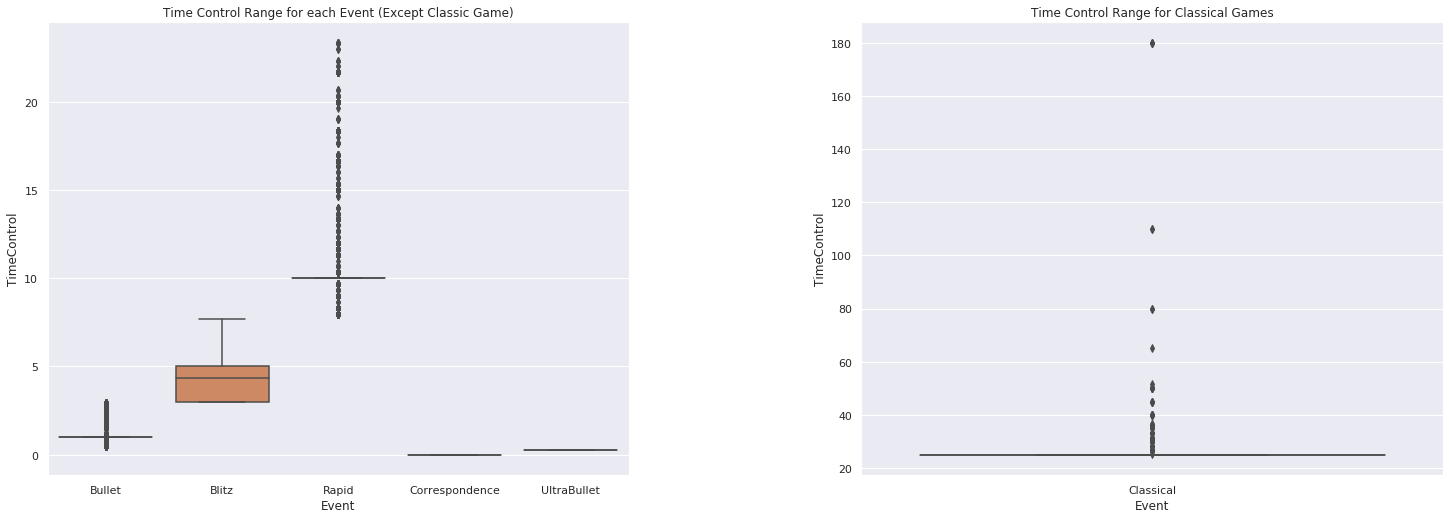

In [ ]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=temp.query('TimeControl<25'), x="Event", y="TimeControl").set(title='Time Control Range for each Event (Except Classic Game)')
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=temp.query('TimeControl>=25'), x="Event", y="TimeControl").set(title='Time Control Range for Classical Games')

plt.show()

### **Moves**

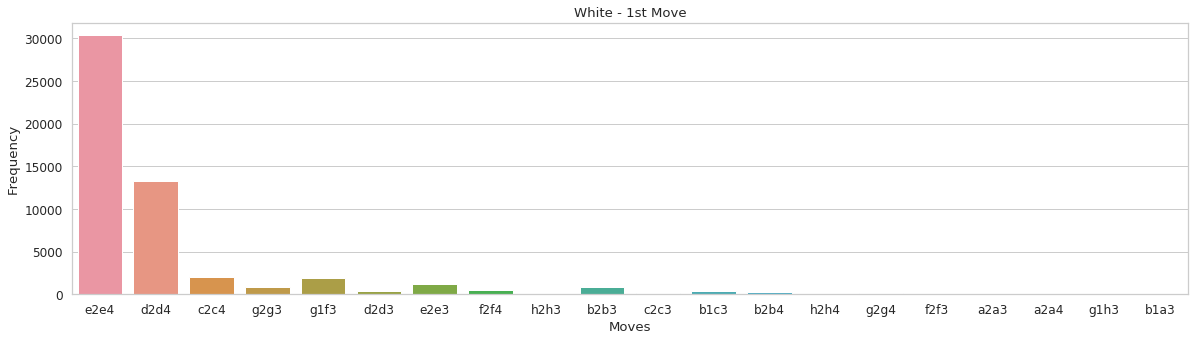

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.countplot(data=temp, x='White1').set(xlabel='Moves', ylabel='Frequency', title='White - 1st Move');

In [ ]:
count  = temp['Black1'].value_counts()
pd.DataFrame({'Black1': count.index, 'Frequency':count.values})

,Black1,Frequency
0,"e2e4,e7e5",11479
1,"e2e4,c7c5",6641
2,"d2d4,d7d5",5276
3,"e2e4,e7e6",3201
4,"e2e4,d7d5",2939
...,...,...
271,"f2f3,b7b6",1
272,"a2a3,a7a5",1
273,"a2a4,b8c6",1
274,"f2f3,c7c6",1


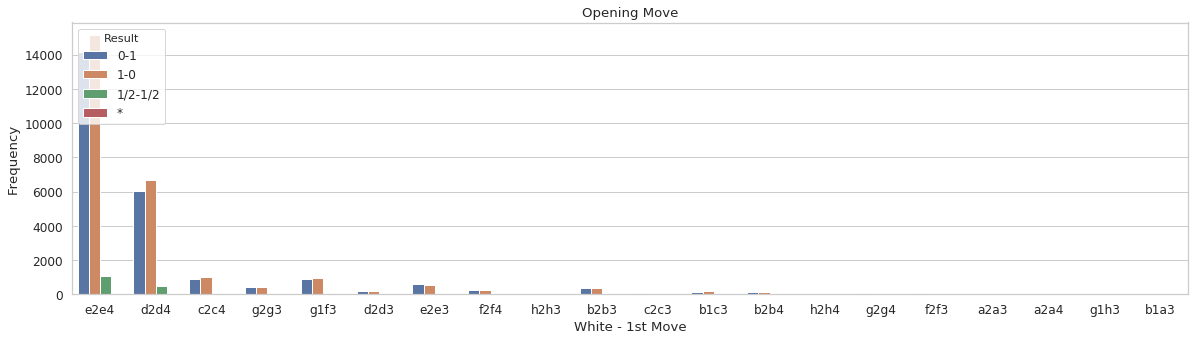

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.countplot(data=temp, x='White1', hue='Result').set(xlabel='White - 1st Move', ylabel='Frequency', title='Opening Move');

### **Result**

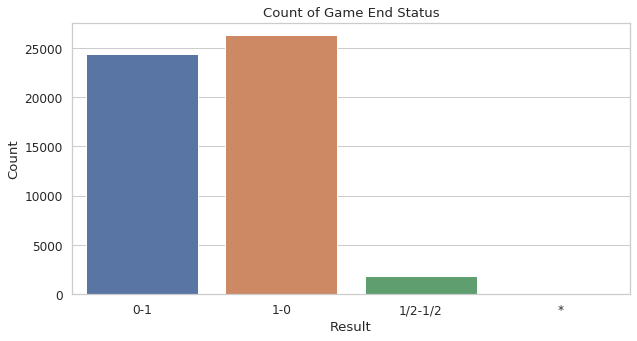

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=temp, x='Result').set(xlabel='Result', ylabel='Count', title='Count of Game End Status');

### **Opening Moves**

In [ ]:
count  = temp['Opening'].value_counts()
pd.DataFrame({'Opening Move': count.index, 'Frequency':count.values})

,Opening Move,Frequency
0,Modern Defense,1043
1,Van't Kruijs Opening,1020
2,Scandinavian Defense: Mieses-Kotroc Variation,958
3,Queen's Pawn Game: Mason Attack,774
4,Sicilian Defense,770
...,...,...
1832,"Philidor Defense: Lion Variation, Lion's Claw II",1
1833,"Queen's Indian Defense: Classical Variation, T...",1
1834,Caro-Kann Defense: Finnish Variation,1
1835,"Queen's Indian Defense: Fianchetto Variation, ...",1


### **Termination**

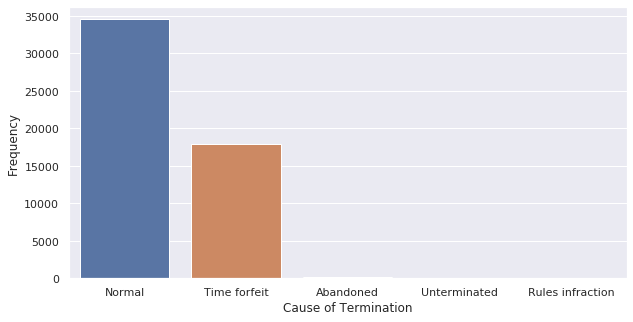

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=temp, x='Termination').set(xlabel='Cause of Termination', ylabel='Frequency');

### **ECO**

In [ ]:
count  = temp['ECO'].value_counts()
pd.DataFrame({'ECO': count.index, 'Frequency':count.values})

,ECO,Frequency
0,A00,3286
1,A40,2654
2,B01,2448
3,C00,2118
4,D00,2033
...,...,...
414,A91,1
415,E28,1
416,E09,1
417,D89,1


### **White / Black Rating Diff**

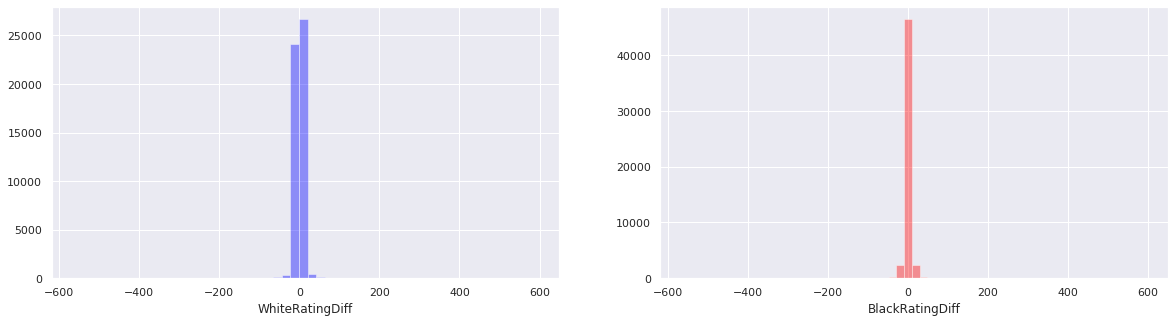

In [ ]:
sns.set()
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(df_raw['WhiteRatingDiff'], color='blue',kde=False, ax=ax[0])
sns.distplot(df_raw['BlackRatingDiff'], color='red',kde=False, ax=ax[1])

## **Implementation**

### **Predict ELO - Regression**

In [ ]:
new_df = df_raw.copy()

new_df.drop(['White','Black', 'UTCDate', 'UTCTime', 'Moves', 'White1', 'Black1', 'White2', 'Black2'], axis=1, inplace=True)

white_df = new_df.copy()
black_df = new_df.copy()

white_df.drop(['BlackElo','BlackRatingDiff'], axis=1, inplace=True)
black_df.drop(['WhiteElo','WhiteRatingDiff'], axis=1, inplace=True)

In [ ]:
white_df

,ID,Event,Result,ECO,Opening,Termination,TimeControl,WhiteElo,WhiteRatingDiff
0,0,23,0,224,507,0,113,1688,-10.0
1,1,23,0,84,1404,0,113,1418,-8.0
2,2,23,1,45,1753,0,113,2002,7.0
3,3,23,1,26,330,0,113,2096,8.0
4,4,23,1,15,292,0,113,2079,7.0
...,...,...,...,...,...,...,...,...,...
52627,52627,0,1,122,1550,0,32,1780,6.0
52628,52628,0,1,238,1312,0,32,1421,8.0
52629,52629,0,0,174,468,0,32,1214,-6.0
52630,52630,0,0,224,627,0,32,1669,-105.0


In [ ]:
# WhiteElo

# Split Data into train and test
train_data1, test_data1 = train_test_split(white_df, train_size=0.8)

# Y - Train & Test
Y_train1 = train_data1['WhiteElo'].values.reshape(-1,1)
Y_test1 = test_data1['WhiteElo'].values.reshape(-1,1)

# Target data
target_df1 = train_data1['WhiteElo'].values.reshape(-1,1)
target_df1_test = test_data1['WhiteElo'].values.reshape(-1,1)

# For Output
Tid1 = test_data1['ID'].values

# Drop columns
train_data1.drop(['ID', 'WhiteElo'], axis =1, inplace=True)
test_data1.drop(['ID', 'WhiteElo'], axis =1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
target_df1

32848    1627
46358    1792
29428    1174
19814    1057
31988    1466
         ... 
16837    1327
27989    1410
17591    1510
36758    1445
42891    1530
Name: WhiteElo, Length: 41828, dtype: int64

In [ ]:
# BlackElo

# Split Data into train and test
train_data2, test_data2 = train_test_split(black_df, train_size=0.8)

# Target data
target_df2 = train_data2['BlackElo']
target_df2_test = test_data2['BlackElo']

# For Output
Tid2 = test_data2['ID'].values

# Drop columns
train_data2.drop(['ID', 'BlackElo'], axis =1, inplace=True)
test_data2.drop(['ID', 'BlackElo'], axis =1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### **Linear Regression**

In [ ]:
import numpy as np
# Train Model
w_linreg_model1 = LinearRegression().fit(train_data1, target_df1)

# Prediction
Y_pred1 = w_linreg_model1.predict(test_data1)

# Submission
#output1 = pd.DataFrame({'Id': Tid1, 'WhiteElo': Y_pred1})
#output1.to_csv("/content/drive/Shared drives/DSF_Project/Models Output/linreg_WhiteElo.csv", index=False)

# Score
#print(w_linreg_model1.rsquared)
print('Score: ')
#print(metrics.r2_score(target_df1_test,Y_pred1))
#print(w_linreg_model1.score(test_data1,target_df1_test))
print(w_linreg_model1.score(train_data1, target_df1))
#print(np.sqrt(mse(target_df1_test, Y_pred1)))

Score: 
0.014219963208178867


In [ ]:
len(target_df1_test)

10458

In [ ]:
# Train Model
w_linreg_model2 = LinearRegression().fit(train_data2, target_df2)

# Prediction
Y_pred2 = w_linreg_model2.predict(test_data2)

# Submission
output2 = pd.DataFrame({'Id': Tid2, 'WhiteElo': Y_pred2})
output2.to_csv("/content/drive/Shared drives/DSF_Project/Models Output/linreg_BlackElo.csv", index=False)

# Score
print('Score: ')
print(w_linreg_model2.score(train_data1, target_df1))

Score: 
-0.519618373422998


#### **LGBM**

In [ ]:
# For Output
#Tid_white = white_df['ID'].values
#Tid_black = black_df['ID'].values

# Drop columns
white_df.drop(['ID'], axis =1, inplace=True)
black_df.drop(['ID'], axis =1, inplace=True)

KeyError: ignored

In [ ]:
count  = target_white.value_counts()
pd.DataFrame({'ELO': count.index, 'Frequency':count.values})

,ELO,Frequency
0,Class_1500_2000,25938
1,Class_1500,19182
2,Class_2000,7166


In [ ]:
# Train Model
x, x_test, y, y_test = train_test_split(white_df, target_white, test_size=0.2, random_state=42, stratify=target_white)

In [ ]:
import lightgbm

categorical_features = [c for c, col in enumerate(white_df.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

lgbm_model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


ValueError: ignored